In [1]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pyfilaments.analysisutils as analysis
from pyfilaments._def_analysis import *
import pandas as pd
import h5py

from joblib import Parallel, delayed
import multiprocessing
%matplotlib notebook
plt.close('all')
# Create a folder for storing Publication figures
publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Figure3'

import _figure_parameters

linux system
dict_keys(['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_linux_x86_64-linux-gnu', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'sphinxcontrib', 'runpy', 'pkgutil', 'ipykernel', 'ipykernel._version', 'ipykernel.connect', '__future__', 'json', 'json.decoder', '

In [2]:
# Load the Orbit map
file = '/home/deepak/Dropbox/LacryModeling/processed_data/figures/OrbitMap.csv'
df_orbit_map = pd.read_csv(file)

In [3]:
# Load the Lyapunov exponent data
file = '/home/deepak/Dropbox/LacryModeling/processed_data/IC_sensitivity_analysis/lyapunov_exp_vs_potDipole strength.csv'

df_lyapunov = pd.read_csv(file)

In [5]:
# Load the Eigenvalue data
file = '/home/deepak/Dropbox/LacryModeling/processed_data/figures/n_sign_eigenvalues.csv'

df_sig_eigenvalues = pd.read_csv(file)

<IPython.core.display.Javascript object>


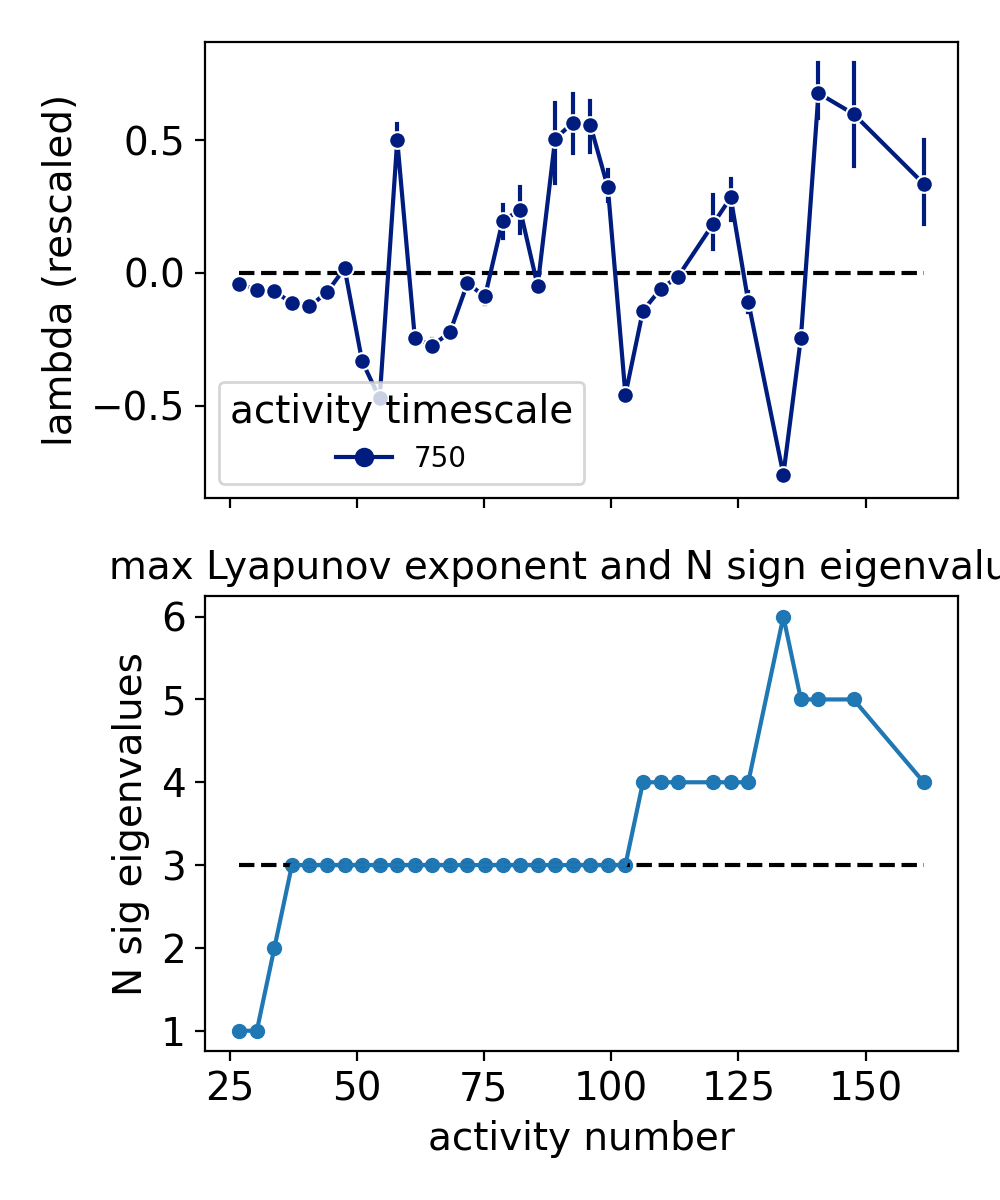

In [31]:
# Plot with shared x-axis
save = True
categories = ['no buckling', '1-period', 'odd-period','2n-period','aperiodic','escape']
markers = {'no buckling':'.', '1-period':'o','2n-period':'^','aperiodic':'X'}

cmap = plt.cm.get_cmap('Set2_r', 255)
linear_array = np.linspace(0,1,len(categories))
colors={}
for ii, cat in enumerate(categories):
    
    colors[cat]=cmap(linear_array[ii])
    
parameter = 'activity number'
style_parameter = 'filament behavior'

fig, [ax1, ax2] = plt.subplots(nrows=2, ncols = 1, sharex=True, figsize=(5,6))

title = "max Lyapunov exponent and N sign eigenvalues"
# Orbit map
# sns.scatterplot(data = df_orbit_map, x = parameter, y = 'Base-Tip angles', hue = style_parameter, 
#                 style = style_parameter, estimator = None, legend= True, rasterized = True, 
#                 hue_order = categories, markers = markers, palette = colors, ax = ax0)

# Lyapunov exponents
sns.lineplot(data = df_lyapunov, x = parameter, y = 'lambda (rescaled)', style = 'activity timescale', 
             hue="activity timescale", err_style = 'bars', markers = True, color = 'r', palette = 'dark', ax = ax1)
ax1.hlines(y=0, xmin=min(df_lyapunov[parameter]),xmax=max(df_lyapunov[parameter]), linestyle = '--', color = 'k')


# N sign eigenvalues
sns.scatterplot(data = df_sig_eigenvalues, x = parameter, y = 'N sig eigenvalues', palette = 'dark', ax = ax2)
sns.lineplot(data = df_sig_eigenvalues, x = parameter, y = 'N sig eigenvalues', markers = True, palette = 'dark', 
             ax = ax2)
ax2.hlines(y=3, xmin=min(df_sig_eigenvalues[parameter]),xmax=max(df_sig_eigenvalues[parameter]), 
           linestyle = '--', color = 'k')
plt.yticks([1,2,3,4,5,6])
plt.title(title)
plt.tight_layout()

if(save):

    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)

plt.show()
